 # Linear Regression - Least Squares

  -------------

 This project implements least squares regression in `Python` and is heavily adapted from Columbia Engineering | Emeritus Institute of Mangement's course - Applied Machine Learning

  This project includes:
  - Calculating least squares weights
  - reading data to return a `Pandas` DataFrame
  - selecting data by column
  - implementing column cutoffs

 ** Motivation**: Least squares regression offers a way to build a closed-form and interpretable model.

 **Problem**: Using housing data, we will attempt to predict house price using living area with a regression model.

 **Data**: [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).


 ### Introduction and Review


  We use the matrix version of the least squares solution to derive the desired result. This expresses the least squares coefficients $w_{LS}$ as a vector, and calculates that vector as a function of $X$, the matrix of inputs, and $y$, the vector of outputs from the training set:

  $$w_{LS} = (X^T X)^{−1}X^T y,$$

  where $w_{LS}$ refers to the vector of weights we are trying to find, $X$ is the matrix of inputs, and $y$ is the output vector.

  In this equation, $X$ is always defined to have a vector of $1$ values as its first column. In other words, even when there is only one input value for each data point, $X$ takes the form:

  $$
  X = \begin{bmatrix}
  1 \  x_{11}  \\
  1 \  x_{21}  \\
  \vdots \ \vdots \\
  1 \ x_{n1}
  \end{bmatrix}
  $$

  For two inputs per data point, $X$ will take this form:

  $$
  X = \begin{bmatrix}
  1 \  x_{11} \  x_{12} \\
  1 \  x_{21} \  x_{22} \\
  \vdots \ \vdots \\
  1 \ x_{n1} \  x_{n2}
  \end{bmatrix}
  $$




  ### Data Exploration

  Before writing the algorithm, we take a look at the data using `Python`'s `pandas` and for visualizations we use `matplotlib`.

In [107]:
#get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)



In [108]:
### Read in the data already provided in the current folder
tr_path = './train.csv'
test_path = './test.csv'
data = pd.read_csv(tr_path)


In [109]:
### Quick look at some aspects of the data:
print("Shape:", data.shape)

print("Columns:", data.columns)

data.head()


Shape: (1460, 81)
Columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


  #### Visualizations

Text(0, 0.5, 'SalePrice')

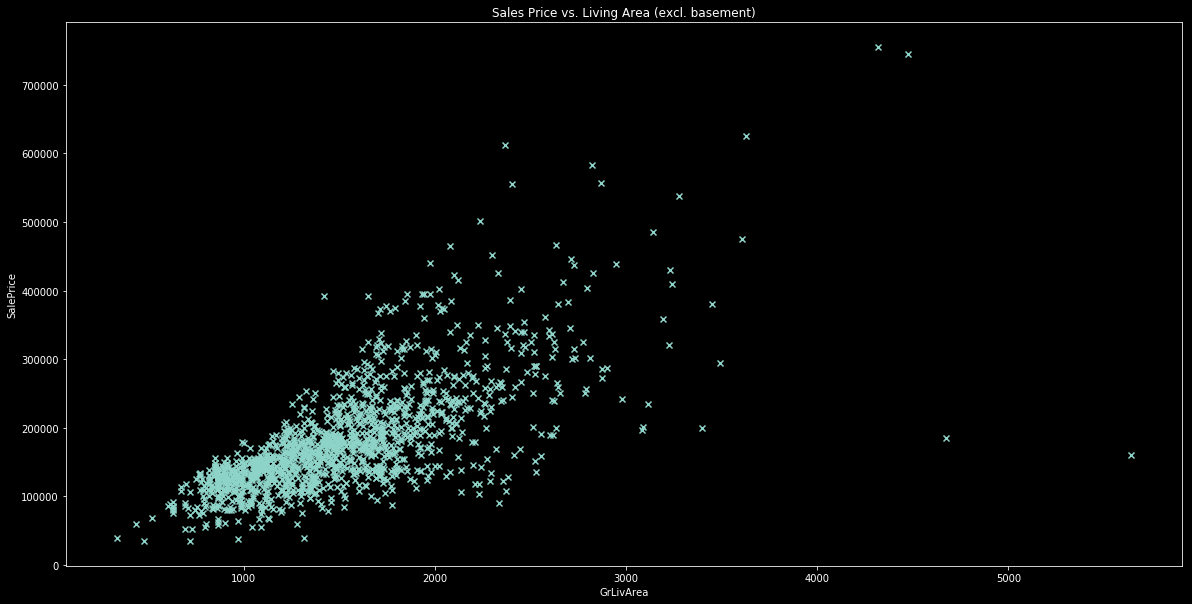

In [110]:
### Price vs. living area with matplotlib

Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = "x")

### Annotations
plt.title("Sales Price vs. Living Area (excl. basement)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")



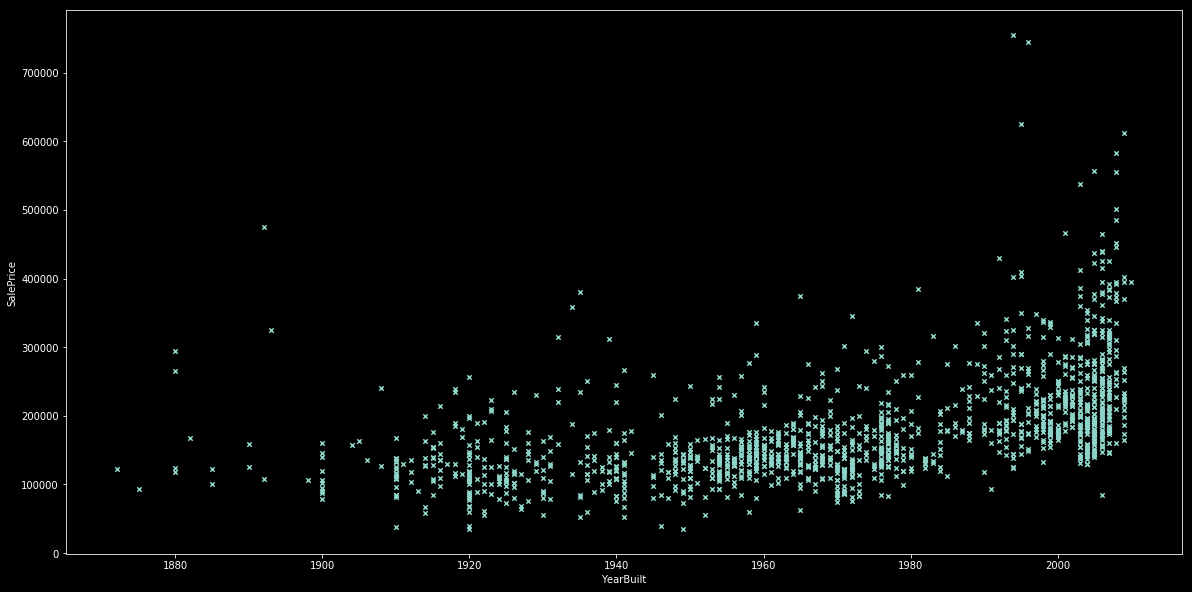

In [111]:
### Price vs. Year Using Pandas
### 

data.plot('YearBuilt', 'SalePrice', kind = 'scatter', marker = 'x')



In [112]:
### Accepts as input a path to a CSV file and returns a DataFrame


def read_to_df(file_path):
    """Read on-disk data and return a dataframe."""
    df_file = pd.read_csv(file_path)
    
    return df_file



 #### Subset Data by Column:

In [113]:
def select_columns(data_frame, column_names):
    """Return a subset of a data frame by column names.
    
    Positional arguments:
        data_frame -- a pandas DataFrame object
        column_names -- a list of column names to select
    """
    return data_frame[column_names]



  #### Subset Data by Value:

In [114]:
def column_cutoff(data_frame, cutoffs):
    """Subset data frame by cutting off limits on column values.
    
    Positional arguments:
        data -- pandas DataFrame object
        cutoffs -- list of tuples in the format: 
        (column_name, min_value, max_value)        
     """
    
    for t in cutoffs:
        data_frame = data_frame[(data_frame[t[0]] >= t[1]) & (data_frame[t[0]] <= t[2])]
    
    return data_frame


  Next we implement the equation above for $w_{LS}$ using the inverse matrix function.
  $$w_{LS} = (X^T X)^{−1}X^T y,$$

  #### Least Squares

In [115]:
### Build a function called "least_squares_weights"
### take as input two matricies corresponding to the X inputs and y target
### and assume the matricies are of the correct dimensions
### The y input should end up as a n-by-1 matrix, and the x input as a n-by-p matrix

import numpy as np
from numpy.linalg import inv


def least_squares_weights(input_x, target_y):
    """Calculate linear regression least squares weights.
    
    Positional arguments:
        training_input_x -- matrix of training input data
        training_output_y -- vector of training output values
        
        The dimensions of X and y will be either p-by-n and 1-by-n
        Or n-by-p and n-by-1
        
    Assumptions:
        -- training_input_y is a vector whose length is the same as the
        number of rows in training_x
    """

### Ensure that the number of rows of each matrix is greater than or equal to the number of columns.
### If not, transpose the matricies.
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
    if target_y.shape[0] < target_y.shape[1]:
        target_y = np.transpose(target_y)

### *Prepend* an n-by-1 column of ones to the input_x matrix
    input_x = np.insert(input_x,0,1, axis = 1)

### Calculate the least squares weights.
    weights = np.matmul(np.matmul(inv(np.matmul(np.transpose(input_x),input_x)),np.transpose(input_x)),target_y)
    
    return weights



  #### Testing on Real Data
  We now put it all together to perform linear regression.

In [116]:

df = read_to_df(tr_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)

X = df_sub_cutoff['GrLivArea'].values
Y = df_sub_cutoff['SalePrice'].values

### reshaping for input into function
training_y = np.array([Y])
training_x = np.array([X])

weights = least_squares_weights(training_x, training_y)
print(weights)



[[13454.06670576]
 [  110.78992341]]


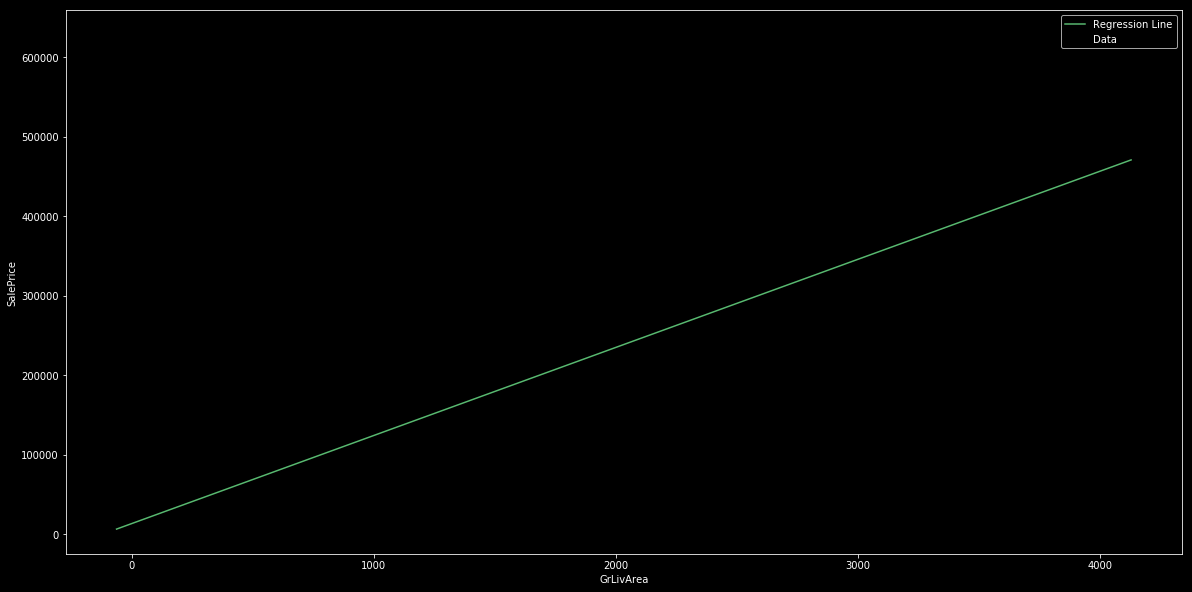

In [117]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500

### Choose points evenly spaced between min_x in max_x
reg_x = np.linspace(min_X, max_X, 1000)

### Use the equation for our line to calculate y values
reg_y = weights[0][0] + weights[1][0] * reg_x

plt.plot(reg_x, reg_y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='k', label='Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


  #### Model Evalutaion
  Here we calculate root mean squared errors with our calculated weights

  #### Calculating RMSE

In [118]:
rmse = 0

b0 = weights[0][0]
b1 = weights[1][0]

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(Y))
print(rmse)


53092.48486948662


  #### Calculating $R^2$

In [119]:
ss_t = 0
ss_r = 0
y_mean = np.mean(Y)

for i in range(len(Y)):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - y_mean) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)


0.5163484562864966


## sklearn implementation
While this project built our model from scratch, we ultimately would like to use conventional methods to fit each model. In particular, we use the `scikit-learn` module.

In [120]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

### sklearn requires a 2-dimensional X and 1 dimensional y. The below yields shapes of:
### skl_X = (n,1); skl_Y = (n,)
skl_X = df_sub_cutoff[['GrLivArea']]
skl_Y = df_sub_cutoff['SalePrice']

lr.fit(skl_X,skl_Y)
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)



Intercept: 13454.066705758654
Coefficient: [110.78992341]
